# Solar Measurements and Analysis
## Wantirna, Victoria, Australia 2015-2020

In [2]:
import glob
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

   ## Load and Clean Monthly Data

In [ ]:
# %ls clean\monthly

In [3]:
data = [pd.read_csv(f,encoding='utf-8',sep=',',skiprows=7,parse_dates=['dd/MM/yyyy'],dayfirst=True) for f in glob.glob('clean/monthly/Coachmans-*.csv')]
dm = pd.concat(data,axis=0,ignore_index=True)
dm.head()

,dd/MM/yyyy,kWh,kWh.1
0,2015-01-01,480.281,21.688
1,2015-01-02,500.843,20.562
2,2015-01-03,523.221,22.378
3,2015-01-04,545.977,22.756
4,2015-01-05,571.203,25.226


In [4]:
dm.columns = ['date','cumulative_kWh','daily_kWh']
dm.head()

,date,cumulative_kWh,daily_kWh
0,2015-01-01,480.281,21.688
1,2015-01-02,500.843,20.562
2,2015-01-03,523.221,22.378
3,2015-01-04,545.977,22.756
4,2015-01-05,571.203,25.226


In [5]:
dm = dm.set_index('date').sort_index()

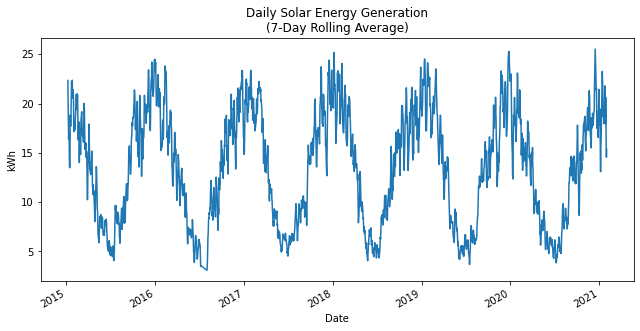

In [50]:
fig, ax = plt.subplots(figsize=(9,4.7))

dm.daily_kWh.rolling(7).mean().plot(ax=ax)
ax.set(xlabel="Date",ylabel="kWh",title="Daily Solar Energy Generation\n(7-Day Rolling Average)")

plt.tight_layout()
plt.savefig("daily_solar.png")

## Load and Clean Daily Data


In [107]:
data = [pd.read_csv(f,encoding='utf-8',sep=',',skiprows=7,parse_dates=['dd/MM/yyyy hh:mm'],dayfirst=True) for f in glob.glob('clean/daily/Coachmans-*.csv')]
dd = pd.concat(data,axis=0,ignore_index=True)
dd.head()

,dd/MM/yyyy hh:mm,kWh,kW
0,2014-12-10 00:00:00,---,---
1,2014-12-10 00:05:00,---,---
2,2014-12-10 00:10:00,---,---
3,2014-12-10 00:15:00,---,---
4,2014-12-10 00:20:00,---,---


In [108]:
dd.columns = ['date','kWh','kW']
dd.head()

dd = dd.set_index('date').sort_index()

In [109]:
dd.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 84176 entries, 2014-12-10 00:00:00 to 2021-01-31 23:55:00
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   kWh     84176 non-null  object
 1   kW      84176 non-null  object
dtypes: object(2)
memory usage: 1.9+ MB


In [110]:
# missing values are imported as a text string so convert to None.
mask = dd['kW'] == '---'

dd.loc[mask,'kW'] = None

dd.head()

,kWh,kW
date,,
2014-12-10 00:00:00,---,None
2014-12-10 00:05:00,---,None
2014-12-10 00:10:00,---,None
2014-12-10 00:15:00,---,None
2014-12-10 00:20:00,---,None


In [111]:
mask = dd['kWh'] == '---'

dd.loc[mask,'kWh'] = None

#dd.interpolate(method='backfill')
#dd[mask]

In [112]:
dd = dd.apply(pd.to_numeric,errors='ignore')
dd.dtypes

kWh    float64
kW     float64
dtype: object

<AxesSubplot:xlabel='date'>

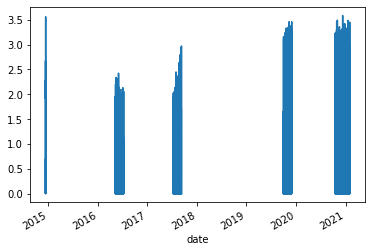

In [113]:
dd.kW.rolling(7).mean().plot()

<Figure size 648x338.4 with 0 Axes>

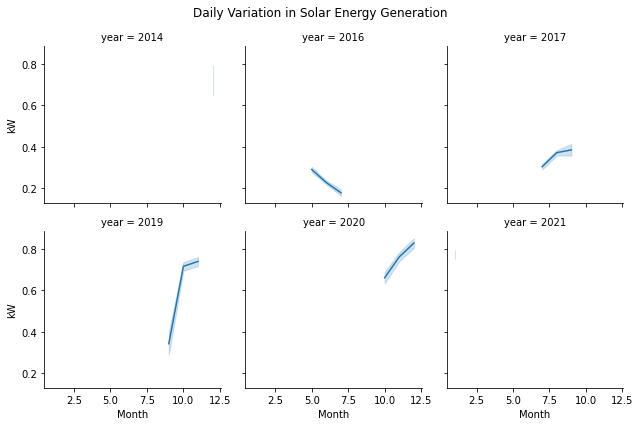

In [60]:
plt.figure(figsize=(9,4.7))

g = sns.FacetGrid(dd,col='year',col_wrap=3)
g.map(sns.lineplot,"month","kW")
g.set_axis_labels("Month","kW")
g.fig.suptitle('Daily Variation in Solar Energy Generation')

g.fig.tight_layout()
#plt.savefig("daily_solar_yearly_facet.png")

In [115]:
dd

,kWh,kW
date,,
2014-12-10 00:00:00,NaN,NaN
2014-12-10 00:05:00,NaN,NaN
2014-12-10 00:10:00,NaN,NaN
2014-12-10 00:15:00,NaN,NaN
2014-12-10 00:20:00,NaN,NaN
...,...,...
2021-01-31 23:35:00,30672.352,0.0
2021-01-31 23:40:00,30672.352,0.0
2021-01-31 23:45:00,30672.352,0.0


In [119]:
pd.DataFrame(dd.index.date).nunique()

0    294
dtype: int64

## Monthly Data Analysis

In [20]:
dm['year'] = dm.index.year
dm['month'] = dm.index.month

In [21]:
dm.head()

,cumulative_kWh,daily_kWh,year,month
date,,,,
2015-01-01,480.281,21.688,2015,1
2015-01-02,500.843,20.562,2015,1
2015-01-03,523.221,22.378,2015,1
2015-01-04,545.977,22.756,2015,1
2015-01-05,571.203,25.226,2015,1


d:\users\emanuel\datascience\sunnyexplorer\env\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 648x338.4 with 0 Axes>

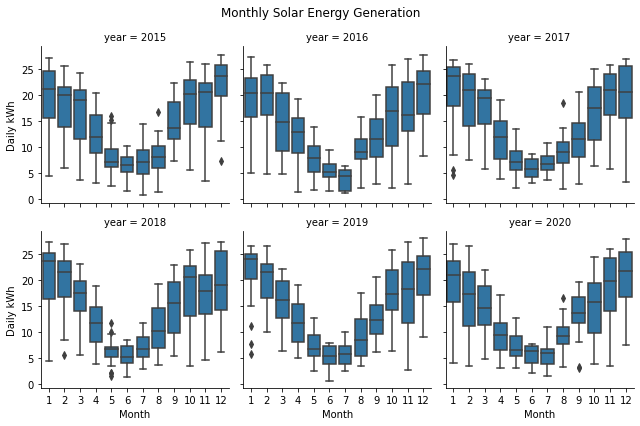

In [120]:
# filter out incomplete 2021 data
plt.figure(figsize=(9,4.7))

g = sns.FacetGrid(dm[dm.year.ne(2021)],col='year',col_wrap=3)
g.map(sns.boxplot,"month","daily_kWh")
g.set_axis_labels("Month","Daily kWh")
g.fig.suptitle('Monthly Solar Energy Generation')

g.fig.tight_layout()
plt.savefig("monthly_solar_yearly_facet.png")

## Daily Data Analysis

<AxesSubplot:xlabel='date'>

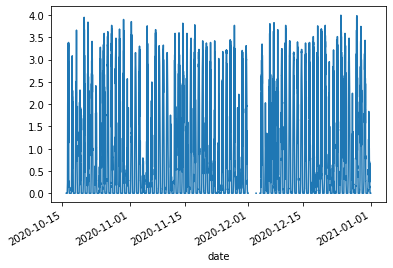

In [24]:
dd['kW'].loc['2020'].plot()

<AxesSubplot:xlabel='month', ylabel='kW'>

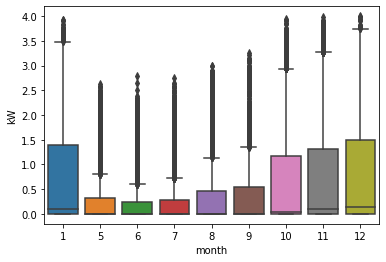

In [25]:
sns.boxplot(data=dd,x='month',y='kW')

<AxesSubplot:xlabel='year', ylabel='kW'>

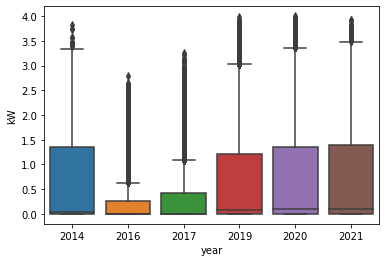

In [26]:
sns.boxplot(data=dd,x='year',y='kW')

In [130]:
# time-series helper columns
dd['era'] = dd.index.year*100 + dd.index.month

dd['today'] = dd.index.date

dd['hour'] = dd.index.hour

In [131]:
# filter for Dec 2020
dt =dd[dd['era']==202012]
dt

,kWh,kW,era,today,hour
date,,,,,
2020-12-03 00:00:00,29511.728,NaN,202012,2020-12-03,0
2020-12-03 00:05:00,29511.728,0.0,202012,2020-12-03,0
2020-12-03 00:10:00,29511.728,0.0,202012,2020-12-03,0
2020-12-03 00:15:00,29511.728,0.0,202012,2020-12-03,0
2020-12-03 00:20:00,29511.728,0.0,202012,2020-12-03,0
...,...,...,...,...,...
2020-12-31 23:35:00,30096.350,0.0,202012,2020-12-31,23
2020-12-31 23:40:00,30096.350,0.0,202012,2020-12-31,23
2020-12-31 23:45:00,30096.350,0.0,202012,2020-12-31,23


<Figure size 648x338.4 with 0 Axes>

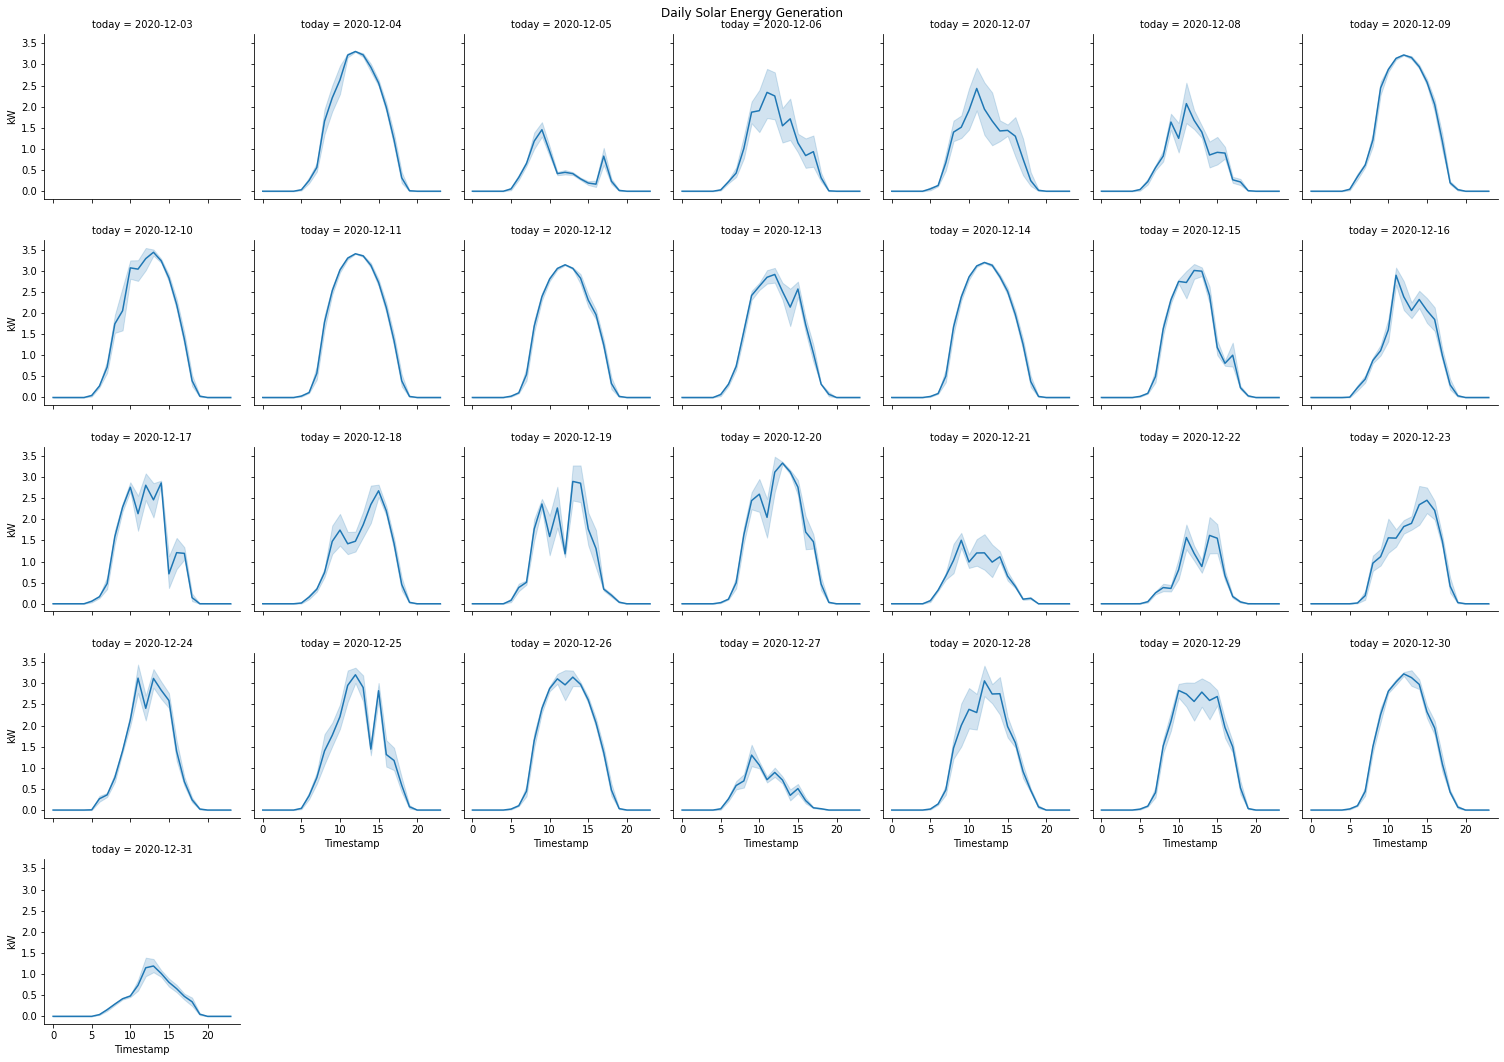

In [132]:
plt.figure(figsize=(9,4.7))

g = sns.FacetGrid(dt,col="today",col_wrap=7)
g.map(sns.lineplot,"hour","kW")
g.set_axis_labels("Timestamp","kW")
g.fig.suptitle('Daily Solar Energy Generation')

g.fig.tight_layout()
plt.savefig("daily_solar_monthly_facet.png")

## Sun Position

In [ ]:
# load and merge BOM solar measurements
#!pip list

In [136]:
import pysolar

In [137]:
from pysolar.solar import *
import datetime

# BOM Mitchum station 86074
lat = -37.82
long = 145.19

In [138]:
from dateutil import tz
MELB = tz.gettz('Australia/Melbourne')
MELB

tzfile('Australia/Melbourne')

In [139]:
# pysolar requires explict timezone
#date = datetime.datetime.now(MELB)
#az = get_azimuth(lat, long, date)
#alt = get_altitude(lat, long, date)
#rad = radiation.get_radiation_direct(date,alt) #Wm-2
#print(date,az,alt,rad)

# date = datetime.datetime(2007, 2, 18, 15, 13, 1, 130320, tzinfo=datetime.timezone.utc)
# print(get_altitude(42.206, -71.382, date))

2021-02-08 13:48:31.669047+11:00 350.61670486599957 66.89234648209774 1043.361377855814


In [169]:
# Using daily data, calculate sun position (az, alt)

di = []
for timestamp in dt.index:

    date = timestamp.to_pydatetime()
    date = date.replace(tzinfo=MELB)

    az = get_azimuth(lat, long, date)
    alt = get_altitude(lat, long, date)
    rad = radiation.get_radiation_direct(date,alt) #Wm-2
    print(timestamp,az,alt,rad)
    
    di.append([timestamp,az,alt,rad])
    
# Calculate off-axis incidence

2020-12-03 00:00:00 198.0702983526114 -27.97321954686954 0.0
2020-12-03 00:05:00 196.80057879655337 -28.26851690173423 0.0
2020-12-03 00:10:00 195.52140365170084 -28.542792276885823 0.0
2020-12-03 00:15:00 194.23335090949197 -28.795757309042305 0.0
2020-12-03 00:20:00 192.93703597502216 -29.027141347772083 0.0
2020-12-03 00:25:00 191.63310876309632 -29.236693022929906 0.0
2020-12-03 00:30:00 190.32225219530187 -29.424181390201447 0.0
2020-12-03 00:35:00 189.0051802085652 -29.589397079536518 0.0
2020-12-03 00:40:00 187.6826347579905 -29.732153462087016 0.0
2020-12-03 00:45:00 186.3553825140529 -29.852287682821036 0.0
2020-12-03 00:50:00 185.02421200522355 -29.94966149730563 0.0
2020-12-03 00:55:00 183.68993071243074 -30.024162012695886 0.0
2020-12-04 00:00:00 198.12810619521798 -27.81457374622378 0.0
2020-12-04 00:05:00 196.86190279778884 -28.110871875075834 0.0
2020-12-04 00:10:00 195.58626109681686 -28.386213202571422 0.0
2020-12-04 00:15:00 194.30175305989803 -28.640309882107164 0.0


2020-12-04 10:50:00 72.51844743687822 56.349590517360596 1029.7455276063818
2020-12-04 10:55:00 71.28402032260342 57.28780504208203 1031.6633296122932
2020-12-04 11:00:00 69.99991738451598 58.21907050012984 1034.4021745733125
2020-12-04 11:05:00 68.66186396214971 59.14262250643923 1036.126657025847
2020-12-04 11:10:00 67.26518824190704 60.057614373579995 1037.7609414699912
2020-12-04 11:15:00 65.80478695478348 60.96310650878181 1039.3080904861367
2020-12-04 11:20:00 64.27509210552995 61.85805391341324 1040.7709555370552
2020-12-04 11:25:00 62.67003999049918 62.741292047218565 1042.1521896514741
2020-12-04 11:30:00 60.98304244657167 63.61152226084566 1043.4542608248528
2020-12-04 11:35:00 59.20696905393753 64.46729376201006 1044.6794615172785
2020-12-04 11:40:00 57.334138516141934 65.3069856995248 1045.829919915333
2020-12-04 11:45:00 55.35633107705246 66.12878656106587 1046.9076084812934
2020-12-04 11:50:00 53.26482816966278 66.93067255674752 1047.9143520005216
2020-12-04 11:55:00 51.0

2020-12-04 20:20:00 241.85420181924613 1.053950307158515 0.4606867024955902
2020-12-04 20:25:00 241.0894626210479 0.3012178867015351 1.2707797226773436e-09
2020-12-04 20:30:00 240.3174903549718 -1.065642510278724 0.0
2020-12-04 20:35:00 239.53798900755453 -1.9195903542115458 0.0
2020-12-04 20:40:00 238.75066367701808 -2.7666919900311537 0.0
2020-12-04 20:45:00 237.95522102005333 -3.6067170424983086 0.0
2020-12-04 20:50:00 237.15136965303253 -4.439428695698489 0.0
2020-12-04 20:55:00 236.3388201823408 -5.264583766220196 0.0
2020-12-04 21:00:00 235.51728527066973 -6.0819327771443055 0.0
2020-12-04 21:05:00 234.68648019215703 -6.8912195952121 0.0
2020-12-04 21:10:00 233.84612357329257 -7.692180983743395 0.0
2020-12-04 21:15:00 232.99593706847992 -8.48454724908837 0.0
2020-12-04 21:20:00 232.1356467821286 -9.268041284777485 0.0
2020-12-04 21:25:00 231.2649830556914 -10.042379241664225 0.0
2020-12-04 21:30:00 230.38368145571684 -10.807270140177229 0.0
2020-12-04 21:35:00 229.4914837294895 -

2020-12-05 07:25:00 105.90266449417985 16.441297176777784 734.847178705105
2020-12-05 07:30:00 105.21701055680212 17.38943400082361 755.0741465245217
2020-12-05 07:35:00 104.53253182914374 18.34095029696533 773.7117343741987
2020-12-05 07:40:00 103.8488679418024 19.295667624939544 790.9265567314884
2020-12-05 07:45:00 103.16564975936551 20.253416016785046 806.8638204644094
2020-12-05 07:50:00 102.4824992394664 21.214031455309282 821.6504010250414
2020-12-05 07:55:00 101.79902783793872 22.17735556062353 835.3974914171471
2020-12-05 08:00:00 101.11483575714347 23.143234193589578 848.2028268863795
2020-12-05 08:05:00 100.4295110111428 24.111516340201803 860.1525701741149
2020-12-05 08:10:00 99.74262803361627 25.082053621748262 871.3229128684399
2020-12-05 08:15:00 99.05374617701439 26.054699894409264 881.7814307347272
2020-12-05 08:20:00 98.36240846701044 27.029310385814508 891.5882276686466
2020-12-05 08:25:00 97.66814033025884 28.005740736443645 900.796907561719
2020-12-05 08:30:00 96.9

2020-12-05 18:50:00 254.67682399921256 17.346060371393413 755.3873811576868
2020-12-05 18:55:00 253.99074393551672 16.398923058545368 735.1162436729214
2020-12-05 19:00:00 253.3031084020021 15.455381349679952 713.0584260032242
2020-12-05 19:05:00 252.6135722011576 14.515636498308256 688.9922020236463
2020-12-05 19:10:00 251.9217959911598 13.579904882426016 662.661858288328
2020-12-05 19:15:00 251.2274459357888 12.64842262790044 633.7727156958699
2020-12-05 19:20:00 250.53019331351055 11.721451623530035 601.986303270878
2020-12-05 19:25:00 249.82971380631096 10.799287285130697 566.9167132527655
2020-12-05 19:30:00 249.1256868274449 9.882269676474568 528.1303260023116
2020-12-05 19:35:00 248.41779526872108 8.970800240566124 485.1533475649737
2020-12-05 19:40:00 247.70572539277813 8.065366609368944 437.49602101320744
2020-12-05 19:45:00 246.9891658110566 7.166578892500146 384.71115307830024
2020-12-05 19:50:00 246.26780793430595 6.275228543167431 326.5224130847627
2020-12-05 19:55:00 245.

2020-12-06 05:45:00 120.52647369615134 -1.7349515561872855 0.0
2020-12-06 05:50:00 119.74919230382837 -0.8809944987592995 0.0
2020-12-06 05:55:00 118.9794210696327 0.45843213985987696 1.7078234622038386e-05
2020-12-06 06:00:00 118.21686569376865 1.2188762630388617 1.3610763438004867
2020-12-06 06:05:00 117.46123055452779 2.0166850631267432 20.077493973540292
2020-12-06 06:10:00 116.71221905494647 2.8423035047102494 66.27162938516949
2020-12-06 06:15:00 115.96953291656362 3.6881966621391893 129.35961219076745
2020-12-06 06:20:00 115.23287294634623 4.549389266831979 197.9238743846145
2020-12-06 06:25:00 114.50193825441188 5.422656420452831 265.3571322888377
2020-12-06 06:30:00 113.77642644050084 6.305858558149409 328.6209676875074
2020-12-06 06:35:00 113.05603362572724 7.197523845029071 386.6248866930633
2020-12-06 06:40:00 112.34045405921007 8.096599160681828 439.22894783772324
2020-12-06 06:45:00 111.6293796909128 9.002301127386215 486.71878637480614
2020-12-06 06:50:00 110.92250009208

2020-12-06 16:30:00 274.99159329474367 44.82098504897138 1000.5315912296007
2020-12-06 16:35:00 274.14802494934247 43.83777122673183 996.9052404724673
2020-12-06 16:40:00 273.3206032997385 42.853537022353834 993.0946301476969
2020-12-06 16:45:00 272.50809800203655 41.868506737891046 989.0891573932329
2020-12-06 16:50:00 271.7093637606671 40.882893285752345 984.8773282549589
2020-12-06 16:55:00 270.9233318485498 39.89689859834058 980.4466626459769
2020-12-06 17:00:00 270.149003486359 38.910715229283674 975.7835930367287
2020-12-06 17:05:00 269.38544376337825 37.924527703422484 970.8733498379892
2020-12-06 17:10:00 268.631775747157 36.93851323843289 965.6998292665435
2020-12-06 17:15:00 267.8871751492374 35.952842373683566 960.245443370765
2020-12-06 17:20:00 267.1508658822754 34.96768005354024 954.4909526076773
2020-12-06 17:25:00 266.422116135066 33.98318677737733 948.4152763923538
2020-12-06 17:30:00 265.70023385491004 32.99951836728915 941.9952685243749
2020-12-06 17:35:00 264.984564

2020-12-07 07:10:00 108.28616921859371 13.600247456376785 664.4823448261503
2020-12-07 07:15:00 107.59604978060113 14.535356049603106 690.7291493683435
2020-12-07 07:20:00 106.90824009854298 15.474504510455626 714.7210132681945
2020-12-07 07:25:00 106.22240396046308 16.417477173539893 736.7124993729868
2020-12-07 07:30:00 105.5381989553557 17.364074055665352 756.9243326169371
2020-12-07 07:35:00 104.8552759862089 18.314107467245282 775.5480556795175
2020-12-07 07:40:00 104.17327881568606 19.26739922775349 792.7501783812702
2020-12-07 07:45:00 103.49184263198391 20.223779690913567 808.6758076421362
2020-12-07 07:50:00 102.81059392423373 21.18308523269766 823.4517260675667
2020-12-07 07:55:00 102.12914890848562 22.145157943954068 837.1890418389013
2020-12-07 08:00:00 101.44711279569975 23.109844241277553 849.9854135249841
2020-12-07 08:05:00 100.764078877816 24.076993758649834 861.9269350167942
2020-12-07 08:10:00 100.07962715903066 25.0464588642148 873.0897363323988
2020-12-07 08:15:00 

2020-12-07 18:15:00 259.3693365127344 24.351954240256845 866.2143918064559
2020-12-07 18:20:00 258.6856983865207 23.384747500003705 854.520451194962
2020-12-07 18:25:00 258.00316542286726 22.419977166293815 841.9960030618229
2020-12-07 18:30:00 257.32132743772553 21.457792667057955 828.5581489389006
2020-12-07 18:35:00 256.6397868517621 20.49834694094096 814.1129468987942
2020-12-07 18:40:00 255.95815739050752 19.5417969915601 798.5536140982862
2020-12-07 18:45:00 255.2760628701951 18.588304580282166 781.758400083889
2020-12-07 18:50:00 254.59313643010648 17.63803762247169 763.5880831594426
2020-12-07 18:55:00 253.90901993266309 16.69117196165073 743.883026120718
2020-12-07 19:00:00 253.2233625128198 15.747892214803507 722.4597038159526
2020-12-07 19:05:00 252.53582056914863 14.808395007030056 699.1067285807063
2020-12-07 19:10:00 251.84605643256828 13.872890962962448 673.5803036603387
2020-12-07 19:15:00 251.15373801253548 12.941608915178474 645.599290846277
2020-12-07 19:20:00 250.45

2020-12-08 05:45:00 120.8262045864187 -1.7285743481552687 0.0
2020-12-08 05:50:00 120.04883677203983 -0.8772655765310813 0.0
2020-12-08 05:55:00 119.27902185827722 0.45940946944192096 1.924936080312021e-05
2020-12-08 06:00:00 118.51646863655658 1.2176339909282832 1.3944783429429792
2020-12-08 06:05:00 117.76088450726303 2.013111182878892 20.31816750332222
2020-12-08 06:10:00 117.01197583795587 2.836367674082383 66.79015421368265
2020-12-08 06:15:00 116.26944726853893 3.6799172812902627 130.1201410039729
2020-12-08 06:20:00 115.5330024894642 4.5388078115492245 198.8715495077507
2020-12-08 06:25:00 114.80234347101064 5.4098246593326635 266.44542638913396
2020-12-08 06:30:00 114.07717066113447 6.290832659788571 329.8149246101259
2020-12-08 06:35:00 113.35718302868922 7.1803616857590775 387.8989907186887
2020-12-08 06:40:00 112.64207768164081 8.077359092646839 440.5645785290136
2020-12-08 06:45:00 111.93154945185024 8.981041422657427 488.10222395218335
2020-12-08 06:50:00 111.2252908272944

2020-12-08 16:20:00 276.6149335911887 47.06805107295294 1009.9182911331533
2020-12-08 16:25:00 275.736056524675 46.08736696871477 1006.684365233355
2020-12-08 16:30:00 274.8761771673544 45.105203352851454 1003.2880450935044
2020-12-08 16:35:00 274.0338549044151 44.12181205870986 999.7205115806729
2020-12-08 16:40:00 273.20775412869284 43.137430208678005 995.972230304082
2020-12-08 16:45:00 272.39663369219 42.15228096703185 992.0328783396112
2020-12-08 16:50:00 271.5993390114302 41.166576098692964 987.8912700075159
2020-12-08 16:55:00 270.8147933893985 40.180516384741146 983.5352653743836
2020-12-08 17:00:00 270.04199122554064 39.194293231403776 978.9516729217067
2020-12-08 17:05:00 269.27999178779453 38.20809002218141 974.1261394813466
2020-12-08 17:10:00 268.5279131961087 37.222082842083104 969.0430233907236
2020-12-08 17:15:00 267.78492697900674 36.23644110753355 963.6852506223514
2020-12-08 17:20:00 267.05025353556687 35.25132864958119 958.0341543668835
2020-12-08 17:25:00 266.32315

2020-12-09 03:30:00 145.7878809372514 -21.17867467985322 0.0
2020-12-09 03:35:00 144.71215047821732 -20.61573684321547 0.0
2020-12-09 03:40:00 143.6495825099285 -20.037766472201408 0.0
2020-12-09 03:45:00 142.6001510913855 -19.445145847971666 0.0
2020-12-09 03:50:00 141.56380567235226 -18.838254275150096 0.0
2020-12-09 03:55:00 140.54047305969019 -18.217467708267083 0.0
2020-12-09 04:00:00 139.53005798666194 -17.583157610961127 0.0
2020-12-09 04:05:00 138.53244572772024 -16.93569111810265 0.0
2020-12-09 04:10:00 137.54750261942644 -16.27542999557925 0.0
2020-12-09 04:15:00 136.57507791258308 -15.602730498150427 0.0
2020-12-09 04:20:00 135.61500540956692 -14.917943215913652 0.0
2020-12-09 04:25:00 134.6671045210913 -14.22141261241314 0.0
2020-12-09 04:30:00 133.73118128098324 -13.513476590200812 0.0
2020-12-09 04:35:00 132.80702980798668 -12.79446647111331 0.0
2020-12-09 04:40:00 131.89443380519134 -12.064707135819633 0.0
2020-12-09 04:45:00 130.99316675819767 -11.32451622368587 0.0
202

2020-12-09 14:05:00 318.7689280418912 71.14929979763434 1056.580973406726
2020-12-09 14:10:00 315.91611772680744 70.48076540055652 1055.9294507851018
2020-12-09 14:15:00 313.232780127103 69.77797124981596 1055.2154530386763
2020-12-09 14:20:00 310.708999201183 69.04444983379703 1054.4378438858744
2020-12-09 14:25:00 308.3343240451893 68.28340477756907 1053.595375382818
2020-12-09 14:30:00 306.0981923783442 67.49772217771468 1052.686682356257
2020-12-09 14:35:00 303.990236218364 66.68999078690382 1051.7102779809702
2020-12-09 14:40:00 302.0004841561647 65.86252463966758 1050.6645470550827
2020-12-09 14:45:00 300.11949060483533 65.01738833493485 1049.547739836635
2020-12-09 14:50:00 298.338407783468 64.15642225681366 1048.3579652245544
2020-12-09 14:55:00 296.64901580625053 63.28126634332503 1047.0931826611481
2020-12-09 15:00:00 295.04372447145704 62.39338222969815 1045.7511931432598
2020-12-09 15:05:00 293.5155569541823 61.4940739692855 1044.3296300523268
2020-12-09 15:10:00 292.058121

2020-12-10 01:35:00 173.8763103763255 -29.042074101569362 0.0
2020-12-10 01:40:00 172.5671479263712 -28.925253990856383 0.0
2020-12-10 01:45:00 171.26245465448596 -28.786108424039465 0.0
2020-12-10 01:50:00 169.9629697474591 -28.624792047094886 0.0
2020-12-10 01:55:00 168.669408635446 -28.441482349222056 0.0
2020-12-10 02:00:00 167.3824607362972 -28.236378775189053 0.0
2020-12-10 02:05:00 166.10278726934874 -28.00970176336131 0.0
2020-12-10 02:10:00 164.8310186630312 -27.761691596303063 0.0
2020-12-10 02:15:00 163.56775226276494 -27.492607145421168 0.0
2020-12-10 02:20:00 162.31355102850165 -27.20272468555359 0.0
2020-12-10 02:25:00 161.06894269191503 -26.89233674189925 0.0
2020-12-10 02:30:00 159.8344175373007 -26.561750495618863 0.0
2020-12-10 02:35:00 158.61042899420352 -26.211286782392154 0.0
2020-12-10 02:40:00 157.39739201124812 -25.841278445167603 0.0
2020-12-10 02:45:00 156.19568337964705 -25.452069117095906 0.0
2020-12-10 02:50:00 155.0056421203329 -25.044012007765026 0.0
2020

2020-12-10 15:25:00 288.02854724242815 57.941656455495114 1038.8137642770341
2020-12-10 15:30:00 286.7987795119556 57.00031498592704 1036.966464328796
2020-12-10 15:35:00 285.61551677246894 56.05297259421986 1035.0218889042421
2020-12-10 15:40:00 284.4750311048579 55.100249419716725 1032.976187132164
2020-12-10 15:45:00 283.37392106945947 54.14270781178217 1030.8252259128506
2020-12-10 15:50:00 282.30908063556404 53.18085937741009 1028.5645687795454
2020-12-10 15:55:00 281.2776709243312 52.215171319191974 1026.189453064214
2020-12-10 16:00:00 280.27709319212636 51.24607073587437 1023.6947614718903
2020-12-10 16:05:00 279.30496640084874 50.273950225119314 1021.0749956453371
2020-12-10 16:10:00 278.3591050331566 49.29917097725615 1018.3242418010079
2020-12-10 16:15:00 277.4375004032913 48.322066690064204 1015.4361361864457
2020-12-10 16:20:00 276.53830371129055 47.34294693143814 1012.4038265705356
2020-12-10 16:25:00 275.6598103524904 46.362099617611676 1009.2199279146187
2020-12-10 16:3

2020-12-11 01:25:00 176.63011606469385 -29.12607301007372 0.0
2020-12-11 01:30:00 175.31605260443254 -29.05646364052635 0.0
2020-12-11 01:35:00 174.0048380686264 -28.964316602678426 0.0
2020-12-11 01:40:00 172.69724681510152 -28.849735629133328 0.0
2020-12-11 01:45:00 171.39403597585942 -28.71284878038018 0.0
2020-12-11 01:50:00 170.09594362193522 -28.553807876234735 0.0
2020-12-11 01:55:00 168.8036845018981 -28.372787566565556 0.0
2020-12-11 02:00:00 167.5179477802901 -28.169984458668875 0.0
2020-12-11 02:05:00 166.23939484157106 -27.945616170085493 0.0
2020-12-11 02:10:00 164.96865668443473 -27.699920194600175 0.0
2020-12-11 02:15:00 163.70633161250944 -27.433152661448112 0.0
2020-12-11 02:20:00 162.45298391094454 -27.14558716229059 0.0
2020-12-11 02:25:00 161.2091429798446 -26.83751360915686 0.0
2020-12-11 02:30:00 159.97530109027554 -26.509236652994876 0.0
2020-12-11 02:35:00 158.7519139485299 -26.161074689314457 0.0
2020-12-11 02:40:00 157.53939904197082 -25.793358221395202 0.0
20

2020-12-11 11:25:00 64.90329298784847 62.68130002913974 1047.6534105018995
2020-12-11 11:30:00 63.28678188042586 63.569125363331295 1048.972468223334
2020-12-11 11:35:00 61.58444954727942 64.4441084087834 1050.215213388103
2020-12-11 11:40:00 59.788467101012884 65.30476059299521 1051.3837971348253
2020-12-11 11:45:00 57.89034733457014 66.14940975705878 1052.4802154719239
2020-12-11 11:50:00 55.880947402036426 66.97617658462549 1053.5063174001282
2020-12-11 11:55:00 53.75050089737573 67.78294980257013 1054.4638128856725
2020-12-11 12:00:00 51.488693537711214 68.56736030469675 1055.3542800361336
2020-12-11 12:05:00 49.08480090641197 69.32675487349435 1056.179171109841
2020-12-11 12:10:00 46.52790879354782 70.05817161156128 1056.9398179467726
2020-12-11 12:15:00 43.80723660115814 70.7583207122258 1057.6374379023373
2020-12-11 12:20:00 40.912598172234766 71.42357169733687 1058.2731377011748
2020-12-11 12:25:00 37.835013312290215 72.0499548804648 1058.8479183146505
2020-12-11 12:30:00 34.56

2020-12-11 21:45:00 227.76339969247488 -12.032534289222419 0.0
2020-12-11 21:50:00 226.84988430521418 -12.757822528858414 0.0
2020-12-11 21:55:00 225.92483949944585 -13.472276895915552 0.0
2020-12-11 22:00:00 224.9880551041533 -14.17557304924825 0.0
2020-12-11 22:05:00 224.03933252051644 -14.867379684447155 0.0
2020-12-11 22:10:00 223.07848497588827 -15.547359371911796 0.0
2020-12-11 22:15:00 222.10533909484974 -16.215168475535734 0.0
2020-12-11 22:20:00 221.1197364225239 -16.87045723600356 0.0
2020-12-11 22:25:00 220.12153449179544 -17.512870259680362 0.0
2020-12-11 22:30:00 219.11060792001834 -18.142047040215466 0.0
2020-12-11 22:35:00 218.0868500870062 -18.7576221823956 0.0
2020-12-11 22:40:00 217.05017501557066 -19.35922562144822 0.0
2020-12-11 22:45:00 216.0005178947356 -19.946483715643122 0.0
2020-12-11 22:50:00 214.93783770663774 -20.5190191771692 0.0
2020-12-11 22:55:00 213.86211776344277 -21.07645227022268 0.0
2020-12-11 23:00:00 212.773367645038 -21.618401265108414 0.0
2020-1

2020-12-12 08:35:00 97.38955585162186 29.726722614242664 922.3703297699676
2020-12-12 08:40:00 96.69393676807262 30.70541248827599 930.0871267682443
2020-12-12 08:45:00 95.99389730861778 31.68556259869085 937.3677391483201
2020-12-12 08:50:00 95.28887446651859 32.667030340074945 944.2439016857059
2020-12-12 08:55:00 94.57827663864994 33.64967134469302 950.7443315523534
2020-12-12 09:00:00 93.86148071698285 34.633339219154934 956.8950722613458
2020-12-12 09:05:00 93.13782929296447 35.61788472406627 962.7197891009706
2020-12-12 09:10:00 92.4066276744366 36.60315478272999 968.2400260541898
2020-12-12 09:15:00 91.66713959012206 37.58899277271888 973.4754374428175
2020-12-12 09:20:00 90.91858399391063 38.57523678131709 978.4439801131508
2020-12-12 09:25:00 90.16012997259391 39.56171979075687 983.1620924053191
2020-12-12 09:30:00 89.39089217979546 40.54826846551821 987.6448449454333
2020-12-12 09:35:00 88.609925663539 41.534701998644934 991.9060745883131
2020-12-12 09:40:00 87.81621970777591

2020-12-12 19:20:00 250.40321575221446 12.696410296371518 643.2244236517968
2020-12-12 19:25:00 249.70931601765895 11.77403847943805 611.8294314880666
2020-12-12 19:30:00 249.01197839468958 10.856596542716325 577.1947100324436
2020-12-12 19:35:00 248.31089130543097 9.944418200769592 538.8885215104622
2020-12-12 19:40:00 247.60574676509412 9.037896247852979 496.4353740328105
2020-12-12 19:45:00 246.8962393570955 8.137504661821378 449.33620277606127
2020-12-12 19:50:00 246.182066667901 7.243834294204375 397.11930191137725
2020-12-12 19:55:00 245.46292833558357 6.357645826920944 339.45370033235116
2020-12-12 20:00:00 244.73852608952024 5.4799556914499625 276.38826442104767
2020-12-12 20:05:00 244.00856373801523 4.612175677257902 208.83712729085102
2020-12-12 20:10:00 243.27274681018346 3.756344232136362 139.51524170001088
2020-12-12 20:15:00 242.53078222609517 2.915512421811771 74.51710078552806
2020-12-12 20:20:00 241.78237839710332 2.0943610043905836 24.835345412688095
2020-12-12 20:25:

2020-12-13 06:15:00 116.93807585012783 3.5580199880344896 123.59102846378705
2020-12-13 06:20:00 116.20125349295473 4.410673424520925 192.61285093219726
2020-12-13 06:25:00 115.47036729160047 5.2758819801364565 260.9169534738296
2020-12-13 06:30:00 114.74512340093612 6.151412351694158 325.16225593401276
2020-12-13 06:35:00 114.02522650851415 7.0357313820858165 384.1187010709446
2020-12-13 06:40:00 113.31037947966185 7.927745124582461 437.59101768990996
2020-12-13 06:45:00 112.60028296964873 8.826642343215164 485.8492762548085
2020-12-13 06:50:00 111.89463538358737 9.731798572636032 529.3457271805052
2020-12-13 06:55:00 111.19313288547954 10.6427159062352 568.5792146656757
2020-12-13 07:00:00 110.49546842287097 11.558985470089782 604.0333797648906
2020-12-13 07:05:00 109.80133212901278 12.480261204704515 636.1510665945905
2020-12-13 07:10:00 109.11041026988977 13.406243726612951 665.3263467319646
2020-12-13 07:15:00 108.42238509389998 14.336668244807916 691.9046809790118
2020-12-13 07:2

2020-12-13 16:55:00 270.70555754531506 40.846421801974095 990.4411538319507
2020-12-13 17:00:00 269.9343560754527 39.860121869853806 986.0377223148807
2020-12-13 17:05:00 269.1741354990618 38.87386519360172 981.4039394183202
2020-12-13 17:10:00 268.42399722052477 37.887826503898616 976.5251724486251
2020-12-13 17:15:00 267.6830981881012 36.90217377878704 971.3854677058526
2020-12-13 17:20:00 266.9506461063895 35.917069336017384 965.9674049236297
2020-12-13 17:25:00 266.2258952110061 34.932670988183716 960.251933059302
2020-12-13 17:30:00 265.5081414942669 33.94913181188318 954.2181755164536
2020-12-13 17:35:00 264.79671977971947 32.96660185009441 947.8432199868066
2020-12-13 17:40:00 264.0909996806544 31.985227783746577 941.1018653962573
2020-12-13 17:45:00 263.3903828393451 31.00515389500109 933.966340282955
2020-12-13 17:50:00 262.6943003305652 30.026522860034593 926.4059783534352
2020-12-13 17:55:00 262.00220993901604 29.0494759969419 918.3868403322425
2020-12-13 18:00:00 261.313593

2020-12-14 03:30:00 146.49248865089717 -21.08448317879551 0.0
2020-12-14 03:35:00 145.41555313642812 -20.53167987265822 0.0
2020-12-14 03:40:00 144.35160176699165 -19.9636955533393 0.0
2020-12-14 03:45:00 143.3006257007584 -19.380908823833543 0.0
2020-12-14 03:50:00 142.26259112044713 -18.783695813048965 0.0
2020-12-14 03:55:00 141.23744115038696 -18.17242977395471 0.0
2020-12-14 04:00:00 140.22509638289574 -17.5474799261953 0.0
2020-12-14 04:05:00 139.2254574618059 -16.909211581841816 0.0
2020-12-14 04:10:00 138.23840557613045 -16.257985087266178 0.0
2020-12-14 04:15:00 137.26380429480213 -15.594155650815551 0.0
2020-12-14 04:20:00 136.30150119118127 -14.918073159256622 0.0
2020-12-14 04:25:00 135.35132889532335 -14.230081693694707 0.0
2020-12-14 04:30:00 134.4131061058078 -13.530519070501885 0.0
2020-12-14 04:35:00 133.48663905643207 -12.819716794369679 0.0
2020-12-14 04:40:00 132.5717230244557 -12.098000170301894 0.0
2020-12-14 04:45:00 131.66814253834414 -11.365687487635071 0.0
202

2020-12-14 15:25:00 288.0561483661217 58.45959201513705 1042.524188101471
2020-12-14 15:30:00 286.81659247481423 57.5183170695466 1040.7309760079684
2020-12-14 15:35:00 285.6248554622518 56.570990031121305 1038.8429583422392
2020-12-14 15:40:00 284.4770532828418 55.618242870386304 1036.8564406118612
2020-12-14 15:45:00 283.36964815246563 54.66064765650062 1034.7674583723838
2020-12-14 15:50:00 282.2994149481676 53.69872395693864 1032.5717572643603
2020-12-14 15:55:00 281.26341072459036 52.73294546809679 1030.2647714755115
2020-12-14 16:00:00 280.2589457426825 51.763744558936395 1027.8415968545137
2020-12-14 16:05:00 279.2835593458427 50.79151807587153 1025.2969660527497
2020-12-14 16:10:00 278.3349962939397 49.81663060427937 1022.6252160738194
2020-12-14 16:15:00 277.41118679494696 48.83941852281236 1019.820255775341
2020-12-14 16:20:00 276.51022844911006 47.86019348209901 1016.8755296623538
2020-12-14 16:25:00 275.63036959632905 46.8792449793407 1013.7839761958884
2020-12-14 16:30:00 

2020-12-15 03:00:00 153.35909547585862 -24.051558965449928 0.0
2020-12-15 03:05:00 152.20533400074984 -23.599930479695875 0.0
2020-12-15 03:10:00 151.06395589731343 -23.130814399523086 0.0
2020-12-15 03:15:00 149.93513564752703 -22.64458571897549 0.0
2020-12-15 03:20:00 148.81901504104476 -22.14162256998129 0.0
2020-12-15 03:25:00 147.71570329946752 -21.622304741474547 0.0
2020-12-15 03:30:00 146.62527883464713 -21.0870128985111 0.0
2020-12-15 03:35:00 145.54779089754936 -20.536127822164538 0.0
2020-12-15 03:40:00 144.48326070562695 -19.970029432365745 0.0
2020-12-15 03:45:00 143.43168262444934 -19.389095845664045 0.0
2020-12-15 03:50:00 142.39302595059092 -18.793702797405118 0.0
2020-12-15 03:55:00 141.36723682128553 -18.1842232338607 0.0
2020-12-15 04:00:00 140.35423873444068 -17.561026151223633 0.0
2020-12-15 04:05:00 139.35393512839937 -16.924476714017853 0.0
2020-12-15 04:10:00 138.36620987197358 -16.274935193162815 0.0
2020-12-15 04:15:00 137.3909290976995 -15.612756787573355 0.0

2020-12-15 14:35:00 304.3698065427872 67.45310864939796 1056.6259386314969
2020-12-15 14:40:00 302.3227268272421 66.6288514381225 1055.634090212074
2020-12-15 14:45:00 300.39144152535624 65.7862721192416 1054.5732488906322
2020-12-15 14:50:00 298.5663027223917 64.9273248106362 1053.4416412478502
2020-12-15 14:55:00 296.8383621761652 64.05374494998068 1052.2373521565478
2020-12-15 15:00:00 295.1993746585242 63.16707406217701 1050.9583164741402
2020-12-15 15:05:00 293.6417795141175 62.26868283785195 1049.6023105861923
2020-12-15 15:10:00 292.15866804939475 61.359792078692585 1048.16694342651
2020-12-15 15:15:00 290.74374076255424 60.44149017624532 1046.6496446775839
2020-12-15 15:20:00 289.391263709202 59.51475029178342 1045.0476548067952
2020-12-15 15:25:00 288.09602088246305 58.58044374168639 1043.3580110419148
2020-12-15 15:30:00 286.8532694091771 57.63935284912489 1041.5775340912794
2020-12-15 15:35:00 285.65869646392787 56.69218210715974 1039.7028134581842
2020-12-15 15:40:00 284.50

2020-12-16 05:00:00 129.26088344451006 -9.178437507872466 0.0
2020-12-16 05:05:00 128.39901134188386 -8.409388885599466 0.0
2020-12-16 05:10:00 127.54730903421742 -7.631172741266336 0.0
2020-12-16 05:15:00 126.70552108435055 -6.844067332528517 0.0
2020-12-16 05:20:00 125.87338733190666 -6.048344145300928 0.0
2020-12-16 05:25:00 125.05064378894514 -5.244268284882962 0.0
2020-12-16 05:30:00 124.23702236566858 -4.432097805391296 0.0
2020-12-16 05:35:00 123.43225220354597 -3.6120846700333415 0.0
2020-12-16 05:40:00 122.63605929747742 -2.784474097204904 0.0
2020-12-16 05:45:00 121.84816717084826 -1.9495050067158803 0.0
2020-12-16 05:50:00 121.06829736858896 -1.1074103760168792 0.0
2020-12-16 05:55:00 120.29616947990635 0.25609454744460897 2.0159654320877853e-11
2020-12-16 06:00:00 119.53150112263894 0.9965651333888207 0.3529759963137789
2020-12-16 06:05:00 118.77400829902967 1.776110382107103 12.662648524025764
2020-12-16 06:10:00 118.02340579673825 2.5859094752078833 53.07313140945023
2020

2020-12-16 15:30:00 286.90289885048435 57.75672897207846 1042.385644339589
2020-12-16 15:35:00 285.7051991787058 56.80977633119259 1040.5238690820788
2020-12-16 15:40:00 284.5520860258692 55.857350306514554 1038.5647650368633
2020-12-16 15:45:00 283.43995131405313 54.90003006126841 1036.504443172033
2020-12-16 15:50:00 282.36550798153246 53.9383411926468 1034.3387304343644
2020-12-16 15:55:00 281.3257584907102 52.97276252324444 1032.063148775416
2020-12-16 16:00:00 280.3179649563366 52.003730780442716 1029.6728889365877
2020-12-16 16:05:00 279.33962423434224 51.03164651518632 1027.162786273923
2020-12-16 16:10:00 278.3884435569197 50.056877459928195 1024.5272891398586
2020-12-16 16:15:00 277.462319956226 49.07976266386624 1021.76042727002
2020-12-16 16:20:00 276.55932167598934 48.10061604013815 1018.8557765730969
2020-12-16 16:25:00 275.67767105261333 47.1197289981413 1015.8064185798534
2020-12-16 16:30:00 274.8157291952846 46.13737272620995 1012.604895252014
2020-12-16 16:35:00 273.97

2020-12-17 01:50:00 170.8942886919495 -28.285908788747584 0.0
2020-12-17 01:55:00 169.60642973350133 -28.118625921351796 0.0
2020-12-17 02:00:00 168.3245867790272 -27.92957219254822 0.0
2020-12-17 02:05:00 167.04942672507067 -27.718949556989724 0.0
2020-12-17 02:10:00 165.7815881853668 -27.486980166807385 0.0
2020-12-17 02:15:00 164.52167906119394 -27.233905206142722 0.0
2020-12-17 02:20:00 163.27027508045194 -26.95998378001183 0.0
2020-12-17 02:25:00 162.02791878175515 -26.665491825853085 0.0
2020-12-17 02:30:00 160.79511711351205 -26.350720596771062 0.0
2020-12-17 02:35:00 159.57234183131172 -26.015975697501194 0.0
2020-12-17 02:40:00 158.36002767544016 -25.66157549757817 0.0
2020-12-17 02:45:00 157.15857249317065 -25.287849945195582 0.0
2020-12-17 02:50:00 155.9683374269997 -24.895139378059376 0.0
2020-12-17 02:55:00 154.78964670321602 -24.48379315512802 0.0
2020-12-17 03:00:00 153.62278765826727 -24.054168280570163 0.0
2020-12-17 03:05:00 152.4680116087428 -23.606628276744903 0.0
2

2020-12-17 12:00:00 53.44501924709863 68.37040714368591 1058.7766282831517
2020-12-17 12:05:00 51.125748424160236 69.15118415375551 1059.627861879045
2020-12-17 12:10:00 48.656665676535 69.90608026903766 1060.4149613647578
2020-12-17 12:15:00 46.02611852376043 70.63196512570883 1061.1391868568583
2020-12-17 12:20:00 43.222664221539986 71.32535560692641 1061.8016872589062
2020-12-17 12:25:00 40.2356030447545 71.98240524819947 1062.4035053304317
2020-12-17 12:30:00 37.05569626682063 72.59890785848015 1062.9455812718652
2020-12-17 12:35:00 33.676079479612184 73.17032359795414 1063.4287560992097
2020-12-17 12:40:00 30.093358603896206 73.69183571398298 1063.853774923597
2020-12-17 12:45:00 26.308837650484747 74.15844547677682 1064.2212897612924
2020-12-17 12:50:00 22.329771352177517 74.5651111749312 1064.5318617416901
2020-12-17 12:55:00 18.170467615750937 74.9069331752713 1064.7859630344126
2020-12-17 13:00:00 13.853004007636883 75.17937977729962 1064.9839788113104
2020-12-17 13:05:00 9.40

2020-12-17 22:10:00 223.43448590968305 -14.894053567118009 0.0
2020-12-17 22:15:00 222.47150094629592 -15.56654744183924 0.0
2020-12-17 22:20:00 221.49625350898887 -16.226725343139606 0.0
2020-12-17 22:25:00 220.50859688035558 -16.8742379475922 0.0
2020-12-17 22:30:00 219.50840053625365 -17.5087307605657 0.0
2020-12-17 22:35:00 218.49555176479652 -18.129844309340964 0.0
2020-12-17 22:40:00 217.46995748781808 -18.737214328189154 0.0
2020-12-17 22:45:00 216.431544742453 -19.330472821690492 0.0
2020-12-17 22:50:00 215.38026324778286 -19.909247952668945 0.0
2020-12-17 22:55:00 214.3160859083804 -20.473165206475333 0.0
2020-12-17 23:00:00 213.23901070953178 -21.021847801580428 0.0
2020-12-17 23:05:00 212.1490624789069 -21.554917272310426 0.0
2020-12-17 23:10:00 211.04629405249773 -22.071994410524084 0.0
2020-12-17 23:15:00 209.93078737555354 -22.572700245859885 0.0
2020-12-17 23:20:00 208.80265513016818 -23.056656805983504 0.0
2020-12-17 23:25:00 207.66204246533582 -23.52348789893374 0.0
20

2020-12-18 13:10:00 5.329933351755898 75.52265344302367 1065.7265870230688
2020-12-18 13:15:00 0.7390752097526274 75.57501330769179 1065.7631872369561
2020-12-18 13:20:00 356.1407005769828 75.54822167552766 1065.7444777552942
2020-12-18 13:25:00 351.5810228427008 75.44271914763083 1065.6704306008724
2020-12-18 13:30:00 347.10377693405377 75.26020914110474 1065.5409345047779
2020-12-18 13:35:00 342.747640875919 75.0035257344844 1065.3557944970214
2020-12-18 13:40:00 338.5443953182691 74.67642774120519 1065.114731326982
2020-12-18 13:45:00 334.51797892709294 74.28335117643013 1064.8173802820759
2020-12-18 13:50:00 330.68441892168056 73.82915498113171 1064.4632901521934
2020-12-18 13:55:00 327.05243879064744 73.31888641995685 1064.0519213575458
2020-12-18 14:00:00 323.62451034758385 72.75758518185 1063.5826440989388
2020-12-18 14:05:00 320.3981030446083 72.15013347686492 1063.054736230661
2020-12-18 14:10:00 317.36693969913415 71.50115144358674 1062.4673805466698
2020-12-18 14:15:00 314.5

2020-12-19 02:00:00 168.5881371829625 -27.909859707047968 0.0
2020-12-19 02:05:00 167.31284066294592 -27.70372804051716 0.0
2020-12-19 02:10:00 166.04471936549336 -27.476223625945256 0.0
2020-12-19 02:15:00 164.78438585417612 -27.227583247378334 0.0
2020-12-19 02:20:00 163.53242100274335 -26.958061802667675 0.0
2020-12-19 02:25:00 162.289372926059 -26.66793122824514 0.0
2020-12-19 02:30:00 161.05575452360628 -26.357478999064792 0.0
2020-12-19 02:35:00 159.83204382156924 -26.027007170093448 0.0
2020-12-19 02:40:00 158.61868209380881 -25.676830801330247 0.0
2020-12-19 02:45:00 157.41607392907724 -25.307276775396723 0.0
2020-12-19 02:50:00 156.22458736566114 -24.918682610396825 0.0
2020-12-19 02:55:00 155.04455362972018 -24.511395094499452 0.0
2020-12-19 03:00:00 153.87626710973234 -24.08576890922354 0.0
2020-12-19 03:05:00 152.71998618311778 -23.64216549933843 0.0
2020-12-19 03:10:00 151.5759343650646 -23.180952073176197 0.0
2020-12-19 03:15:00 150.44430008093818 -22.70250003342713 0.0
2

2020-12-19 12:35:00 34.4473922343677 73.10728364783151 1064.3484971532766
2020-12-19 12:40:00 30.89917246251187 73.64022727058489 1064.7836320797162
2020-12-19 12:45:00 27.147022046580048 74.11921469796742 1065.1613111692145
2020-12-19 12:50:00 23.196846653386274 74.53916669118593 1065.4821111855144
2020-12-19 12:55:00 19.061481515719322 74.89510294682827 1065.746519867533
2020-12-19 13:00:00 14.761525054131113 75.18236308049865 1065.954937958114
2020-12-19 13:05:00 10.325592810333632 75.39685639107134 1066.1076803452195
2020-12-19 13:10:00 5.7897536108008865 75.53531789709069 1066.2049773937354
2020-12-19 13:15:00 1.1960546512656265 75.5955373194823 1066.2469756415587
2020-12-19 13:20:00 356.59020636863124 75.57652710276764 1066.2337383279162
2020-12-19 13:25:00 352.0187070619194 75.47860095968908 1066.165245664652
2020-12-19 13:30:00 347.52584331455955 75.30334866036807 1066.0413947261727
2020-12-19 13:35:00 343.1510376086786 75.05351180035241 1065.8619990680634
2020-12-19 13:40:00 3

2020-12-19 23:00:00 213.42980637510047 -20.874176410350696 0.0
2020-12-19 23:05:00 212.34302200186227 -21.4100787270563 0.0
2020-12-19 23:10:00 211.24342451048037 -21.930069355195133 0.0
2020-12-19 23:15:00 210.13109024166653 -22.433769821370202 0.0
2020-12-19 23:20:00 209.00612594543685 -22.92080247799459 0.0
2020-12-19 23:25:00 207.86867051910153 -23.39079127149899 0.0
2020-12-19 23:30:00 206.71889512598017 -23.843363208473274 0.0
2020-12-19 23:35:00 205.55700548543115 -24.278148919314834 0.0
2020-12-19 23:40:00 204.3832417243801 -24.694784211105148 0.0
2020-12-19 23:45:00 203.19787961257114 -25.092911039603546 0.0
2020-12-19 23:50:00 202.00123148007648 -25.472178618544948 0.0
2020-12-19 23:55:00 200.79364630874196 -25.83224478032215 0.0
2020-12-20 00:00:00 199.57550958284725 -26.172777334482408 0.0
2020-12-20 00:05:00 198.3472435519678 -26.49345524424407 0.0
2020-12-20 00:10:00 197.10930742791538 -26.7939698032487 0.0
2020-12-20 00:15:00 195.86219565394813 -27.07402622328386 0.0
202

2020-12-20 14:55:00 297.4158932815085 64.5805933505805 1055.5216047784063
2020-12-20 15:00:00 295.7387499578124 63.698099774212665 1054.2891319474118
2020-12-20 15:05:00 294.1467912822233 62.803382099553026 1052.9814082451185
2020-12-20 15:10:00 292.6327202053784 61.89772501825407 1051.5961477933608
2020-12-20 15:15:00 291.18988552967073 60.98227194284722 1050.1308924802395
2020-12-20 15:20:00 289.81223685854775 60.05804340075483 1048.5830025730136
2020-12-20 15:25:00 288.4942747269352 59.12595149380906 1046.949643435717
2020-12-20 15:30:00 287.2310031989335 58.186813680855664 1045.2277729931795
2020-12-20 15:35:00 286.01788403776754 57.241364745968355 1043.4141278720851
2020-12-20 15:40:00 284.85079292064063 56.29026676562045 1041.5052072537298
2020-12-20 15:45:00 283.72597888696373 55.334117744625466 1039.4972550223147
2020-12-20 15:50:00 282.64002774301196 54.37345961514604 1037.3862411927244
2020-12-20 15:55:00 281.58982884832244 53.40878537710158 1035.167841901971
2020-12-20 16:00

2020-12-21 02:00:00 168.84742498603632 -27.920409752634065 0.0
2020-12-21 02:05:00 167.57135866950392 -27.718696119765145 0.0
2020-12-21 02:10:00 166.30233049594298 -27.49557398553939 0.0
2020-12-21 02:15:00 165.04095842968738 -27.251276030483773 0.0
2020-12-21 02:20:00 163.78782916440952 -26.986053262265404 0.0
2020-12-21 02:25:00 162.54349699911216 -26.700173951459057 0.0
2020-12-21 02:30:00 161.3084813234268 -26.393922145592725 0.0
2020-12-21 02:35:00 160.0832669062433 -26.067596714413902 0.0
2020-12-21 02:40:00 158.8683019565714 -25.721509783578743 0.0
2020-12-21 02:45:00 157.66399813855787 -25.355985554221704 0.0
2020-12-21 02:50:00 156.47073065393306 -24.97135911572863 0.0
2020-12-21 02:55:00 155.28883792838462 -24.567975079885162 0.0
2020-12-21 03:00:00 154.118621541249 -24.1461862030875 0.0
2020-12-21 03:05:00 152.9603470074431 -23.706352249937936 0.0
2020-12-21 03:10:00 151.814244887631 -23.248838985938704 0.0
2020-12-21 03:15:00 150.68051052478276 -22.774016604952205 0.0
2020

2020-12-21 12:50:00 24.02471882013853 74.48042169212839 1066.289944702919
2020-12-21 12:55:00 19.920759114862932 74.84982158983198 1066.5648664818325
2020-12-21 13:00:00 15.64689349919334 75.15137385479484 1066.783851582864
2020-12-21 13:05:00 11.230233082715671 75.3808399566384 1066.947230920064
2020-12-21 13:10:00 6.705569638730964 75.53475930312395 1067.0552508878302
2020-12-21 13:15:00 2.1140777038353065 75.61068765516686 1067.108074109569
2020-12-21 13:20:00 357.5011372089358 75.6073809760253 1067.1057800198287
2020-12-21 13:25:00 352.9135195020213 75.52489402010379 1067.048365195237
2020-12-21 13:30:00 348.3963541774716 75.36457587389863 1066.9357433049227
2020-12-21 13:35:00 343.99035635142934 75.12896340486829 1066.7677447845874
2020-12-21 13:40:00 339.72971644856784 74.82159171622595 1066.544116339712
2020-12-21 13:45:00 335.6408741781343 74.44675234144941 1066.2645198730727
2020-12-21 13:50:00 331.7422107687919 74.00923507653064 1065.928531526263
2020-12-21 13:55:00 328.04449

2020-12-22 00:05:00 198.58810214824732 -26.41805478282756 0.0
2020-12-22 00:10:00 197.35232863534011 -26.7225890519203 0.0
2020-12-22 00:15:00 196.10728201075432 -27.006727108924498 0.0
2020-12-22 00:20:00 194.85348521425595 -27.270186080022675 0.0
2020-12-22 00:25:00 193.5914948121802 -27.512699236503657 0.0
2020-12-22 00:30:00 192.32190013625677 -27.734017092529992 0.0
2020-12-22 00:35:00 191.04532197449092 -27.933908534363233 0.0
2020-12-22 00:40:00 189.76241030363897 -28.11216201491866 0.0
2020-12-22 00:45:00 188.4738417295617 -28.268586644176235 0.0
2020-12-22 00:50:00 187.18031735521964 -28.40301309506116 0.0
2020-12-22 00:55:00 185.8825605897041 -28.51529443731411 0.0
2020-12-22 01:00:00 184.5813129893844 -28.605307027923427 0.0
2020-12-22 01:05:00 183.27733251537944 -28.672951048838147 0.0
2020-12-22 01:10:00 181.9713890058741 -28.71815113629702 0.0
2020-12-22 01:15:00 180.6642612637574 -28.740856740152196 0.0
2020-12-22 01:20:00 179.35673387260587 -28.741042403000055 0.0
2020-

2020-12-22 10:20:00 82.23563506881541 49.60224393407096 1025.807083726064
2020-12-22 10:25:00 81.30045301701401 50.57868439513754 1028.491486244893
2020-12-22 10:30:00 80.33932711439678 51.55266760314352 1031.0483758577836
2020-12-22 10:35:00 79.35006754859667 52.523844172736965 1033.4834720483757
2020-12-22 10:40:00 78.3302846832922 53.491834144156876 1035.8020941486145
2020-12-22 10:45:00 77.27736577985823 54.4562239248131 1038.009194290816
2020-12-22 10:50:00 76.18845119449863 55.416560711217244 1040.1093826952813
2020-12-22 10:55:00 75.06040569638782 56.372348206895566 1042.1069549648716
2020-12-22 11:00:00 73.88978815281467 57.32304027696179 1044.4071183180522
2020-12-22 11:05:00 72.67281793075244 58.26803387105692 1046.2096232629128
2020-12-22 11:10:00 71.40533737440838 59.206661442131065 1047.9207987153923
2020-12-22 11:15:00 70.08277087567146 60.138182200959314 1049.5438843160568
2020-12-22 11:20:00 68.7000814677316 61.06177152625051 1051.0818994826882
2020-12-22 11:25:00 67.25

2020-12-22 21:15:00 233.64573335490223 -6.341762118744479 0.0
2020-12-22 21:20:00 232.80972280494282 -7.132437140139816 0.0
2020-12-22 21:25:00 231.96395251470568 -7.9143552447067895 0.0
2020-12-22 21:30:00 231.108166400442 -8.687242207987557 0.0
2020-12-22 21:35:00 230.24211366380592 -9.450816846567177 0.0
2020-12-22 21:40:00 229.36554922534282 -10.204791197077896 0.0
2020-12-22 21:45:00 228.47823420088974 -10.94887070524376 0.0
2020-12-22 21:50:00 227.57993691076314 -11.682754030125041 0.0
2020-12-22 21:55:00 226.67043409600933 -12.40613279313788 0.0
2020-12-22 22:00:00 225.74951098152067 -13.118692334040576 0.0
2020-12-22 22:05:00 224.816963231972 -13.820111034134738 0.0
2020-12-22 22:10:00 223.8725971299261 -14.510061127234394 0.0
2020-12-22 22:15:00 222.9162310498328 -15.188208575941891 0.0
2020-12-22 22:20:00 221.94769688562465 -15.854213108934683 0.0
2020-12-22 22:25:00 220.96684103236126 -16.50772866574102 0.0
2020-12-22 22:30:00 219.97352539986002 -17.14840387056905 0.0
2020-1

2020-12-23 12:45:00 28.68008831161518 73.94538544134807 1066.6125179658418
2020-12-23 12:50:00 24.805765394534433 74.38956384122491 1066.9544875110387
2020-12-23 12:55:00 20.739969095847584 74.77165721384857 1067.2400998784058
2020-12-23 13:00:00 16.500158432314777 75.08684239338682 1067.4697884915713
2020-12-23 13:05:00 12.111817083887018 75.33076458105225 1067.6439006815442
2020-12-23 13:10:00 7.608233130872634 75.49979532200629 1067.762699155521
2020-12-23 13:15:00 3.029388127377814 75.59127688375081 1067.8263627996039
2020-12-23 13:20:00 358.4199469203234 75.60371904640014 1067.8349873157795
2020-12-23 13:25:00 353.8265495441208 75.53691616242995 1067.7885856129794
2020-12-23 13:30:00 349.2947939070417 75.39196362770375 1067.6870878178577
2020-12-23 13:35:00 344.8663850901298 75.17117089592129 1067.5303410036688
2020-12-23 13:40:00 340.5768758507258 74.87788677984878 1067.3181087472378
2020-12-23 13:45:00 336.4542589778875 74.5162658661226 1067.0500701266499
2020-12-23 13:50:00 332

2020-12-24 01:05:00 183.53815129441452 -28.679608273623405 0.0
2020-12-24 01:10:00 182.23212829998644 -28.729350302091902 0.0
2020-12-24 01:15:00 180.9247618023287 -28.756598887970267 0.0
2020-12-24 01:20:00 179.61683630967755 -28.761323469982226 0.0
2020-12-24 01:25:00 178.3091388996413 -28.74351874713654 0.0
2020-12-24 01:30:00 177.00245524646564 -28.703204694026482 0.0
2020-12-24 01:35:00 175.69756636545293 -28.64042644078464 0.0
2020-12-24 01:40:00 174.3952455838712 -28.555254065066304 0.0
2020-12-24 01:45:00 173.09625384728494 -28.447782144260515 0.0
2020-12-24 01:50:00 171.80133777874508 -28.318129336557426 0.0
2020-12-24 01:55:00 170.51122527198513 -28.166437653452633 0.0
2020-12-24 02:00:00 169.2266230323427 -27.992871741662253 0.0
2020-12-24 02:05:00 167.94821414457397 -27.797618083647265 0.0
2020-12-24 02:10:00 166.6766551958434 -27.58088401556585 0.0
2020-12-24 02:15:00 165.41257366309335 -27.34289662464204 0.0
2020-12-24 02:20:00 164.15656626189792 -27.083901684557127 0.0
2

2020-12-24 11:50:00 59.1256370417413 66.1912917084946 1059.1243820462357
2020-12-24 11:55:00 57.15495646803504 67.02939863141334 1060.1479439473478
2020-12-24 12:00:00 55.06410534973482 67.84853337823779 1061.103887242663
2020-12-24 12:05:00 52.84236410036452 68.64639756640855 1061.9937842298061
2020-12-24 12:10:00 50.4784530866352 69.42040538900207 1062.8190827027686
2020-12-24 12:15:00 47.96071587986478 70.16765609818906 1063.581112466747
2020-12-24 12:20:00 45.277412360897074 70.8849078647382 1064.2810896105987
2020-12-24 12:25:00 42.41714214341846 71.56855954044583 1064.9201219067963
2020-12-24 12:30:00 39.369436784197376 72.21464247450737 1065.4992126578786
2020-12-24 12:35:00 36.12554208148475 72.81882977151976 1066.0192643232122
2020-12-24 12:40:00 32.67939771338632 73.37647070560718 1066.4810820565708
2020-12-24 12:45:00 29.028794176850425 73.88265814239344 1066.8853767627334
2020-12-24 12:50:00 25.17664099176315 74.33233649511098 1067.232767522308
2020-12-24 12:55:00 21.132215

2020-12-24 22:25:00 221.181926166033 -16.405456496589743 0.0
2020-12-24 22:30:00 220.19081095792566 -17.04900626158073 0.0
2020-12-24 22:35:00 219.18712467306358 -17.6794306183565 0.0
2020-12-24 22:40:00 218.1707608766575 -18.296368633453522 0.0
2020-12-24 22:45:00 217.14163222750724 -18.89945531058767 0.0
2020-12-24 22:50:00 216.09967301628936 -19.488321427829227 0.0
2020-12-24 22:55:00 215.04483966659677 -20.06259466888726 0.0
2020-12-24 23:00:00 213.97711262386355 -20.621899987037988 0.0
2020-12-24 23:05:00 212.89649812125674 -21.16586014096337 0.0
2020-12-24 23:10:00 211.8030293659543 -21.69409659472524 0.0
2020-12-24 23:15:00 210.69676766974564 -22.206230457522405 0.0
2020-12-24 23:20:00 209.57780411745054 -22.701883196349854 0.0
2020-12-24 23:25:00 208.44626134803357 -23.180677370798033 0.0
2020-12-24 23:30:00 207.30229373009104 -23.64223808055519 0.0
2020-12-24 23:35:00 206.14608971117295 -24.08619349286384 0.0
2020-12-24 23:40:00 204.977871748783 -24.512176379929283 0.0
2020-12

2020-12-25 08:55:00 95.79256597699099 32.55560979234973 951.4248809842611
2020-12-25 09:00:00 95.08703064549083 33.53725683246694 957.8866100133156
2020-12-25 09:05:00 94.37560143720714 34.52003249914819 964.0001477438947
2020-12-25 09:10:00 93.65763666990314 35.5037900251154 969.7891395581696
2020-12-25 09:15:00 92.93245781849159 36.48838004326268 975.2751103029667
2020-12-25 09:20:00 92.19934676921105 37.47364892052862 980.4776856377729
2020-12-25 09:25:00 91.45754125827136 38.459439028881484 985.4147964837938
2020-12-25 09:30:00 90.70623087230646 39.44558763628524 990.1028514131596
2020-12-25 09:35:00 89.9445525101843 40.43192586714918 994.5568892385886
2020-12-25 09:40:00 89.17158493780066 41.41827811453946 998.7907159628872
2020-12-25 09:45:00 88.3863427515434 42.40446137035445 1002.8170256156284
2020-12-25 09:50:00 87.5877701111514 43.39028392485287 1006.6475050861619
2020-12-25 09:55:00 86.77473388276192 44.375543818318064 1010.2929268875552
2020-12-25 10:00:00 85.94601488497709

2020-12-25 19:55:00 246.17460909653937 7.648095837446857 431.2655435712488
2020-12-25 20:00:00 245.45870511279966 6.76049400629075 375.93270972973835
2020-12-25 20:05:00 244.7375984203644 5.880929992900594 314.9277359329206
2020-12-25 20:10:00 244.01099537048094 5.010604607299159 248.5943802030156
2020-12-25 20:15:00 243.2786038908203 4.1512183565803555 178.5403280464168
2020-12-25 20:20:00 242.5401335409209 3.3052727341341073 108.9288254990924
2020-12-25 20:25:00 241.79529571734437 2.476565125877756 48.380637112687474
2020-12-25 20:30:00 241.04380289877048 1.6709180780545014 10.155570747093376
2020-12-25 20:35:00 240.285369429191 0.8967423718996752 0.1611528281248855
2020-12-25 20:40:00 239.51971083413844 0.16228808160236552 4.259156562032873e-19
2020-12-25 20:45:00 238.74654418659551 -1.2171124644406957 0.0
2020-12-25 20:50:00 237.96558842318248 -2.0574986642713764 0.0
2020-12-25 20:55:00 237.17656429639405 -2.8907115713111424 0.0
2020-12-25 21:00:00 236.3791943573175 -3.716517493360

2020-12-26 07:35:00 106.74274929998306 17.007597102482425 765.0358070426205
2020-12-26 07:40:00 106.06390132481194 17.95155325231883 783.9314739012109
2020-12-26 07:45:00 105.38641808005936 18.898998860629202 801.3666484825013
2020-12-26 07:50:00 104.70995074314017 19.849762299031184 817.4925150231677
2020-12-26 07:55:00 104.03414202279686 20.803679453567348 832.4409063806368
2020-12-26 08:00:00 103.3586255858951 21.760592083717224 846.3271252207747
2020-12-26 08:05:00 102.68302531208306 22.720346535337555 859.2523291206112
2020-12-26 08:10:00 102.00695411254574 23.682793123264226 871.3055483812612
2020-12-26 08:15:00 101.3300126580183 24.647785646691172 882.5653868648573
2020-12-26 08:20:00 100.65178837545808 25.615180476965904 893.101451947922
2020-12-26 08:25:00 99.9718544348419 26.58483557555304 902.9755636187019
2020-12-26 08:30:00 99.2897677084639 27.556610863559214 912.2427926601318
2020-12-26 08:35:00 98.60506797456743 28.530366670619685 920.95232444197
2020-12-26 08:40:00 97.9

2020-12-26 18:15:00 259.9806832641983 26.488878737499046 902.3960916299044
2020-12-26 18:20:00 259.3010128609585 25.519243075500125 892.4625598014152
2020-12-26 18:25:00 258.6230127602952 24.551876791945674 881.8611832642734
2020-12-26 18:30:00 257.9462572369082 23.58692165313218 870.5293681481862
2020-12-26 18:35:00 257.27033514797904 22.624521719996903 858.3966172636972
2020-12-26 18:40:00 256.5948484746049 21.664823685092692 845.383291704664
2020-12-26 18:45:00 255.91941096456952 20.70797727851572 831.3991455220468
2020-12-26 18:50:00 255.24364723240518 19.75413628521663 816.3415969845199
2020-12-26 18:55:00 254.56719203763657 18.80345981329511 800.0936813270162
2020-12-26 19:00:00 253.88968873237815 17.856112452169807 782.5215995190784
2020-12-26 19:05:00 253.21078914549236 16.91226657938288 763.4718493024751
2020-12-26 19:10:00 252.5301521672173 15.972103063503214 742.7678029273119
2020-12-26 19:15:00 251.84744330909564 15.035813677300235 720.2057251799151
2020-12-26 19:20:00 251.

2020-12-27 05:10:00 128.48462437428748 -8.467634428387365 0.0
2020-12-27 05:15:00 127.63192002709081 -7.690543834933739 0.0
2020-12-27 05:20:00 126.78914667009838 -6.904534202783297 0.0
2020-12-27 05:25:00 125.95604521380795 -6.109877941192087 0.0
2020-12-27 05:30:00 125.1323518865677 -5.306840334679174 0.0
2020-12-27 05:35:00 124.31779964165835 -4.495680476256389 0.0
2020-12-27 05:40:00 123.5121178308584 -3.676650606545627 0.0
2020-12-27 05:45:00 122.71503294347326 -2.849996544181921 0.0
2020-12-27 05:50:00 121.92626915686779 -2.015958026173168 0.0
2020-12-27 05:55:00 121.14554841230077 -1.1747686237904567 0.0
2020-12-27 06:00:00 120.37259044961672 0.19855340905884694 3.6851068766641275e-15
2020-12-27 06:05:00 119.60711321637936 0.9354456043005392 0.23528914908065268
2020-12-27 06:10:00 118.8488333208646 1.711844343118946 11.44348982534942
2020-12-27 06:15:00 118.09746541779063 2.5192417168742294 51.27194596688261
2020-12-27 06:20:00 117.35272308414875 3.3493393940243674 112.734559251

2020-12-27 14:55:00 298.85564749835004 65.10436307665982 1058.5311733781068
2020-12-27 15:00:00 297.111504745999 64.23283502941062 1057.353595657362
2020-12-27 15:05:00 295.45781584391665 63.347975746483066 1056.102467404888
2020-12-27 15:10:00 293.88688059296885 62.45118438388133 1054.7756155036627
2020-12-27 15:15:00 292.3916597010901 61.5437057148607 1053.370701398159
2020-12-27 15:20:00 290.96573560954664 60.626649873244816 1051.8852122715407
2020-12-27 15:25:00 289.6032657327049 59.70100811560582 1050.316448506373
2020-12-27 15:30:00 288.29893640343994 58.76766779999388 1048.6615118781538
2020-12-27 15:35:00 287.0479171388424 57.8274254444058 1046.9172925052656
2020-12-27 15:40:00 285.84581612531497 56.88099767532645 1045.0804536285877
2020-12-27 15:45:00 284.68863844587133 55.929030735617474 1043.1474147852284
2020-12-27 15:50:00 283.57274800273063 54.972109250731016 1041.114334329123
2020-12-27 15:55:00 282.4948326890375 54.010764043486276 1038.9770906186948
2020-12-27 16:00:00 

2020-12-28 02:05:00 168.42651900860588 -28.0074815691876 0.0
2020-12-28 02:10:00 167.14940148594513 -27.798852641896442 0.0
2020-12-28 02:15:00 165.87955876060116 -27.568834019546156 0.0
2020-12-28 02:20:00 164.61760341282638 -27.31766563850206 0.0
2020-12-28 02:25:00 163.36411638181616 -27.04560563352884 0.0
2020-12-28 02:30:00 162.1196442294008 -26.752928881989387 0.0
2020-12-28 02:35:00 160.8846992305584 -26.43992604283887 0.0
2020-12-28 02:40:00 159.65975722562308 -26.10690200317125 0.0
2020-12-28 02:45:00 158.44525744926227 -25.754174684741034 0.0
2020-12-28 02:50:00 157.2416024384229 -25.38207383852891 0.0
2020-12-28 02:55:00 156.0491575523432 -24.990939661255492 0.0
2020-12-28 03:00:00 154.86825075066974 -24.581121393519304 0.0
2020-12-28 03:05:00 153.6991732451977 -24.152976147654936 0.0
2020-12-28 03:10:00 152.5421804980495 -23.706867859498455 0.0
2020-12-28 03:15:00 151.39749184609215 -23.243165685726378 0.0
2020-12-28 03:20:00 150.26529263171 -22.762243334917514 0.0
2020-12-

2020-12-28 12:45:00 30.266828272360527 73.55813548340723 1067.6142506187202
2020-12-28 12:50:00 26.513181525516416 74.02733546183327 1067.9837494781689
2020-12-28 12:55:00 22.567048798864647 74.43718287178588 1068.296700712798
2020-12-28 13:00:00 18.442100256160813 74.78282709732073 1068.553581325354
2020-12-28 13:05:00 14.159557663786842 75.05976581207064 1068.7547813095766
2020-12-28 13:10:00 9.74831977545216 75.26408865686892 1068.9006053035187
2020-12-28 13:15:00 5.244305606771036 75.39272148981614 1068.9912735343432
2020-12-28 13:20:00 0.6889311835374485 75.44364076617013 1069.0269225972074
2020-12-28 13:25:00 356.12681603316025 75.41602563729474 1069.007605999036
2020-12-28 13:30:00 351.60300761527515 75.31032206986886 1068.9332943198597
2020-12-28 13:35:00 347.16014184496305 75.12820774888395 1068.8038750762007
2020-12-28 13:40:00 342.83597174380395 74.87246418424606 1068.6191524079582
2020-12-28 13:45:00 338.66159128093994 74.54677745976855 1068.378846243315
2020-12-28 13:50:00

2020-12-28 23:25:00 208.96517638284445 -23.13981880528986 0.0
2020-12-28 23:30:00 207.82374226059608 -23.609383964457447 0.0
2020-12-28 23:35:00 206.66991189956713 -24.061465240709236 0.0
2020-12-28 23:40:00 205.50389363467488 -24.495691182810436 0.0
2020-12-28 23:45:00 204.32593113604173 -24.9116954058905 0.0
2020-12-28 23:50:00 203.13630450926263 -25.309117671273828 0.0
2020-12-28 23:55:00 201.9353305902743 -25.687605234631707 0.0
2020-12-29 00:00:00 200.72336301358897 -26.046814200165556 0.0
2020-12-29 00:05:00 199.5007927023467 -26.38641069179109 0.0
2020-12-29 00:10:00 198.26804830338486 -26.706072031090443 0.0
2020-12-29 00:15:00 197.02559470996437 -27.005488361565096 0.0
2020-12-29 00:20:00 195.77393379204028 -27.284363614248498 0.0
2020-12-29 00:25:00 194.51360235004557 -27.542417091709236 0.0
2020-12-29 00:30:00 193.24517144686942 -27.779384603652176 0.0
2020-12-29 00:35:00 191.9692452869323 -27.995019643906208 0.0
2020-12-29 00:40:00 190.68645912861632 -28.189094649488048 0.0

2020-12-29 10:25:00 81.65492482203726 49.78792739851453 1028.5759455645489
2020-12-29 10:30:00 80.70633034587465 50.76277989402974 1031.219024973538
2020-12-29 10:35:00 79.73093419115729 51.73496858225957 1033.7362232260386
2020-12-29 10:40:00 78.72648495402586 52.70412846891868 1036.1331628724172
2020-12-29 10:45:00 77.69052542222168 53.6698632408299 1038.4150751099098
2020-12-29 10:50:00 76.62037103798502 54.6317400570952 1040.5868273367998
2020-12-29 10:55:00 75.51308379714561 55.58928570431432 1042.6529526172826
2020-12-29 11:00:00 74.36544479539812 56.541980761520186 1044.8017868823786
2020-12-29 11:05:00 73.17392379467658 57.48925312683312 1046.6679499557542
2020-12-29 11:10:00 71.93464518081448 58.43047114239806 1048.4403606439262
2020-12-29 11:15:00 70.64335078416816 59.36493567962404 1050.122434594513
2020-12-29 11:20:00 69.29536040461743 60.291870519400646 1051.7173550791213
2020-12-29 11:25:00 67.88552999569171 61.210411262026916 1053.2280877263875
2020-12-29 11:30:00 66.408

2020-12-29 21:05:00 236.02411626654742 -4.347339722915557 0.0
2020-12-29 21:10:00 235.21167004125888 -5.162112020779487 0.0
2020-12-29 21:15:00 234.3901446213384 -5.9688550036739 0.0
2020-12-29 21:20:00 233.55926981111912 -6.7673111531136 0.0
2020-12-29 21:25:00 232.7187786012982 -7.557216642191245 0.0
2020-12-29 21:30:00 231.86840799090572 -8.338300916161712 0.0
2020-12-29 21:35:00 231.00789977001315 -9.110286417954098 0.0
2020-12-29 21:40:00 230.13700091473834 -9.872888750529006 0.0
2020-12-29 21:45:00 229.25546402525524 -10.62581684802572 0.0
2020-12-29 21:50:00 228.3630482941628 -11.368772755957002 0.0
2020-12-29 21:55:00 227.4595206817104 -12.101451353053518 0.0
2020-12-29 22:00:00 226.54465594682242 -12.823541090670652 0.0
2020-12-29 22:05:00 225.61823856076 -13.534723279304204 0.0
2020-12-29 22:10:00 224.68006285695432 -14.234672879731693 0.0
2020-12-29 22:15:00 223.72993447150074 -14.923058345627918 0.0
2020-12-29 22:20:00 222.767671741039 -15.599541626126506 0.0
2020-12-29 22:

2020-12-30 12:45:00 30.785671360897453 73.35344436919812 1067.7599985308584
2020-12-30 12:50:00 27.08580606365726 73.83084261370583 1068.1407642552388
2020-12-30 12:55:00 23.195014779093327 74.25002294598902 1068.464833775892
2020-12-30 13:00:00 19.12560903716866 74.60617333117979 1068.7327023366377
2020-12-30 13:05:00 14.897150519044033 74.89478774966814 1068.9447776124784
2020-12-30 13:10:00 10.536675374213559 75.11190025212872 1069.1013814409118
2020-12-30 13:15:00 6.0781955553908915 75.25432382546194 1069.2027508265091
2020-12-30 13:20:00 1.5613738493730125 75.31986580177009 1069.2490387786388
2020-12-30 13:25:00 357.0294325544977 75.30748848275422 1069.2403149173908
2020-12-30 13:30:00 352.5265395872327 75.2173886291789 1069.176565695095
2020-12-30 13:35:00 348.0950529513044 75.05098214163755 1069.0576943127553
2020-12-30 13:40:00 343.7730394011576 74.81079679950659 1068.8835204571058
2020-12-30 13:45:00 339.59240431041206 74.50029094018328 1068.6537795292681
2020-12-30 13:50:00 3

2020-12-30 23:05:00 213.67731246232188 -21.10026498174627 0.0
2020-12-30 23:10:00 212.5877709895638 -21.63999350446665 0.0
2020-12-30 23:15:00 211.48525981459042 -22.163814389272513 0.0
2020-12-30 23:20:00 210.36984961056916 -22.67134495373693 0.0
2020-12-30 23:25:00 209.2416422494167 -23.162202943048754 0.0
2020-12-30 23:30:00 208.10077107772372 -23.63600796396185 0.0
2020-12-30 23:35:00 206.9474033673696 -24.092381979850924 0.0
2020-12-30 23:40:00 205.78174036760382 -24.53095084284513 0.0
2020-12-30 23:45:00 204.60401875033833 -24.951345224572716 0.0
2020-12-30 23:50:00 203.41451175985654 -25.353201694145064 0.0
2020-12-30 23:55:00 202.21352956015002 -25.736164068821346 0.0
2020-12-31 00:00:00 201.00141935785462 -26.09988477280516 0.0
2020-12-31 00:05:00 199.7785659484949 -26.444026012977606 0.0
2020-12-31 00:10:00 198.54539220924332 -26.768260963063327 0.0
2020-12-31 00:15:00 197.3023576790406 -27.072275402619695 0.0
2020-12-31 00:20:00 196.04995934649304 -27.355768690737744 0.0
202

2020-12-31 11:00:00 74.38913835098438 56.28419005129119 1044.5531975425424
2020-12-31 11:05:00 73.20234817398222 57.23156029058615 1046.440651722784
2020-12-31 11:10:00 71.96848592268108 58.17291112781449 1048.2334597350837
2020-12-31 11:15:00 70.68338451319678 59.10755138112925 1049.9350986737047
2020-12-31 11:20:00 69.34246775888099 60.03471437956945 1051.5488088497764
2020-12-31 11:25:00 67.94071026310256 60.953547184684304 1053.0776089117255
2020-12-31 11:30:00 66.4725936145434 61.86309957436017 1054.5243116508634
2020-12-31 11:35:00 64.93206461243089 62.76230951332306 1055.8915354000035
2020-12-31 11:40:00 63.31249157605052 63.64998864086838 1057.1817173161498
2020-12-31 11:45:00 61.60662613365966 64.52480453268566 1058.3971235871672
2020-12-31 11:50:00 59.80657235159137 65.38526100914711 1059.539859026065
2020-12-31 11:55:00 57.903767877593154 66.22967677949926 1060.611876453896
2020-12-31 12:00:00 55.888985448887425 67.05616203501296 1061.6149851709033
2020-12-31 12:05:00 53.752

2020-12-31 20:40:00 240.21108080340977 0.39776387889240783 2.3801473962237394e-06
2020-12-31 20:45:00 239.44054913576363 -0.9449660213615284 0.0
2020-12-31 20:50:00 238.66237858666113 -1.791696623973477 0.0
2020-12-31 20:55:00 237.87628454572075 -2.6314204311797766 0.0
2020-12-31 21:00:00 237.08198398885642 -3.4639064785637443 0.0
2020-12-31 21:05:00 236.27919589845203 -4.288917639576428 0.0
2020-12-31 21:10:00 235.46764185775513 -5.106210156906714 0.0
2020-12-31 21:15:00 234.64704560863385 -5.915534286108231 0.0
2020-12-31 21:20:00 233.81713429429828 -6.716633298134723 0.0
2020-12-31 21:25:00 232.97763811340508 -7.509244138541892 0.0
2020-12-31 21:30:00 232.1282911308071 -8.293097001550183 0.0
2020-12-31 21:35:00 231.2688320492872 -9.067915048722325 0.0
2020-12-31 21:40:00 230.3990045942872 -9.833414565689743 0.0
2020-12-31 21:45:00 229.51855794200657 -10.589305127263213 0.0
2020-12-31 21:50:00 228.62724767773386 -11.33528936964064 0.0
2020-12-31 21:55:00 227.72483696135396 -12.071062

In [172]:
di = pd.DataFrame(di)
di.dtypes

0    datetime64[ns]
1           float64
2           float64
3           float64
dtype: object

In [176]:
di.columns = ['date','az','alt','Wm-2']
di = di.set_index('date').sort_index()

In [180]:
dt.merge(di,how='inner',on='date')

,kWh,kW,era,today,hour,az,alt,Wm-2
date,,,,,,,,
2020-12-03 00:00:00,29511.728,NaN,202012,2020-12-03,0,198.070298,-27.973220,0.0
2020-12-03 00:05:00,29511.728,0.0,202012,2020-12-03,0,196.800579,-28.268517,0.0
2020-12-03 00:10:00,29511.728,0.0,202012,2020-12-03,0,195.521404,-28.542792,0.0
2020-12-03 00:15:00,29511.728,0.0,202012,2020-12-03,0,194.233351,-28.795757,0.0
2020-12-03 00:20:00,29511.728,0.0,202012,2020-12-03,0,192.937036,-29.027141,0.0
...,...,...,...,...,...,...,...,...
2020-12-31 23:35:00,30096.350,0.0,202012,2020-12-31,23,207.089740,-24.118679,0.0
2020-12-31 23:40:00,30096.350,0.0,202012,2020-12-31,23,205.924069,-24.559470,0.0
2020-12-31 23:45:00,30096.350,0.0,202012,2020-12-31,23,204.746277,-24.982107,0.0


In [ ]:
# solar panel area?  1.0x1.7 m^2

# daylight hours > 15 degrees elevation?

## BOM Observations

In [ ]:
# official daily measurements